In [25]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import f1_score
import pickle
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [7]:
#df=pd.read_csv('cases_train_preprocessed.csv')

/Users/timothywaikinlam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Preparing test data

In [53]:
#dt=pd.read_csv('cases_test_preprocessed.csv')


In [ ]:
dt=pd.read_csv('../results/cases_test_preprocessed.csv')


In [55]:
dt['additional_information'] = dt['additional_information'].apply(convertText)
dt['source'] = dt['source'].apply(convertText)
dt=dt.drop(columns=['province','country','Last_Update','outcome'])


In [56]:
for col in dt.dtypes[dt.dtypes == "object"].index:
    for_dummy = dt.pop(col)
    dt = pd.concat([dt, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [57]:
dt.head()

,age,latitude,longitude,date_confirmation,additional_information,source,Confirmed,Deaths,Recovered,Active,...,sex_Not Available,sex_female,sex_male,age_range_ind_False,age_range_ind_Missing,age_range_ind_True,age_range_adult,age_range_baby,age_range_child,age_range_senior
0,47.0,59.6025,18.1384,1.587107e+09,1,1,23739.0,2400.0,0.0,21339.0,...,1,0,0,0,1,0,1,0,0,0
1,47.0,43.3614,-5.8593,1.589612e+09,1,1,4340.0,341.0,1063.0,2936.0,...,1,0,0,0,1,0,1,0,0,0
2,47.0,59.5350,15.0066,1.586416e+09,1,1,2860.0,172.0,0.0,2688.0,...,1,0,0,0,1,0,1,0,0,0
3,47.0,37.9922,-1.1307,1.586934e+09,1,1,13371.0,193.0,2180.0,10998.0,...,1,0,0,0,1,0,1,0,0,0
4,47.0,56.8967,12.8034,1.590131e+09,1,1,2356.0,83.0,0.0,2273.0,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
df=pd.read_csv('../results/cases_train_preprocessed.csv')

## Preparing data for building model

In [8]:
def convertText(x):
    if x == '[]':
        return 0
    else:
        return 1
df['additional_information'] = df['additional_information'].apply(convertText)

In [9]:
def convertText(x):
    if x == '':
        return 0
    else:
        return 1
df['source'] = df['source'].apply(convertText)

In [10]:
y = df['outcome']
df=df.drop(columns=['province', 'country','Last_Update', 'land', 'outcome'])

In [7]:
df.head()

,age,latitude,longitude,date_confirmation,additional_information,source,Confirmed,Deaths,Recovered,Active,...,sex_Not Available,sex_female,sex_male,age_range_ind_False,age_range_ind_Missing,age_range_ind_True,age_range_adult,age_range_baby,age_range_child,age_range_senior
0,47.0,59.7294,13.2354,1.590822e+09,0,1,1241.0,73.0,0.0,1168.0,...,1,0,0,0,1,0,1,0,0,0
1,47.0,35.2923,-2.9381,1.586934e+09,0,1,664.0,4.0,125.0,535.0,...,1,0,0,0,1,0,1,0,0,0
2,47.0,55.9903,13.5958,1.587625e+09,0,1,5366.0,276.0,0.0,5090.0,...,1,0,0,0,1,0,1,0,0,0
3,47.0,59.6025,18.1384,1.586848e+09,0,1,23739.0,2400.0,0.0,21339.0,...,1,0,0,0,1,0,1,0,0,0
4,47.0,59.6714,16.2159,1.588057e+09,0,1,2854.0,183.0,0.0,2671.0,...,1,0,0,0,1,0,1,0,0,0


In [11]:
for col in df.dtypes[df.dtypes == "object"].index:
    for_dummy = df.pop(col)
    df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [12]:
print(f'label_Y : {y.shape}')
print(f'df_X : {df.shape}')

label_Y : (366600,)
df_X : (366600, 22)


## Split Data

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state = 1)

## Building model with default parameters

For this milestone, I build the model with default parameters, later on I will be tuning all the combinations of hyperparameters to find the best model.

In [251]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [236]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [252]:
print (f'Train Accuracy - : {rf.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf.score(x_test,y_test):.3f}')

Train Accuracy - : 0.889
Test Accuracy - : 0.874


In [253]:
print('Test accuracy: ', accuracy_score(y_test, rf.predict(x_test)))
print('Test overall recall: ', recall_score(y_test, rf.predict(x_test), average='macro'))

Test accuracy:  0.8741953082378614
Test overall recall:  0.6770858746581232


In [36]:
x = precision_recall_fscore_support(y_train, model.predict(x_train), average = None, labels=['deceased', 'hospitalized', 'nonhospitalized', 'recovered'])
dec_x = precision_recall_fscore_support(y_train, model.predict(x_train), average = None, labels=['deceased'])
print(x)
print('deceased:', dec_x) 
print('recall for deceased',x[1][0])
print('fl_score for deceased',x[2][0]) 
print(precision_recall_fscore_support(y_test, model.predict(x_test), average = None, labels=['deceased', 'hospitalized', 'nonhospitalized', 'recovered']))


(array([0.92355009, 0.81305731, 0.99928823, 0.8082391 ]), array([0.29332961, 0.88505299, 0.99944725, 0.73445894]), array([0.44524465, 0.84752893, 0.99936773, 0.76958474]), array([  3583,  99933, 119402,  70362]))
deceased: (array([0.92355009]), array([0.29332961]), array([0.44524465]), array([3583]))
recall for deceased 0.29332961205693553
fl_score for deceased 0.4452446515568736
(array([0.47463768, 0.80284553, 0.99220572, 0.77985215]), array([0.14364035, 0.87382351, 0.99233793, 0.710178  ]), array([0.22053872, 0.83683217, 0.99227182, 0.74338609]), array([  912, 24862, 30018, 17528]))


In [37]:
recall_score(y_train, model.predict(x_train),labels=['deceased'], average='macro')

0.29332961205693553

In [38]:
f1_score(y_train, model.predict(x_train),labels=['deceased'], average='macro')

0.4452446515568736

## Hyperparameters Tuning

In [19]:
def recall_on_deseased(y_true, y_pred):
    score = recall_score(y_true, y_pred, labels=['deceased'], average='macro')
    return score

def fl_score_on_deseased(y_true, y_pred):
    score = f1_score(y_true, y_pred, labels=['deceased'], average='macro')
    return score

def overall_recall(y_true, y_pred):
    score = recall_score(y_true, y_pred, average='macro')
    return score


In [27]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf_paras = {'criterion': ('gini', 'entropy'), 'n_estimators': [20, 50, 100], 'max_features': [0.8, 0.6, 0.4]}
rf_scoring = {'fl_score_deseased': make_scorer(fl_score_on_deseased),
              'recall_deseased': make_scorer(recall_on_deseased),
              'accuracy': make_scorer(accuracy_score),
              'recall': make_scorer(overall_recall)}
rf_Grid = GridSearchCV(rf, param_grid=rf_paras, scoring=rf_scoring, cv=5, verbose=2, n_jobs=4, refit='fl_score_deseased')
rf_Grid.fit(x_train, y_train)



Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  8.6min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 20.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': [0.8, 0.6, 0.4],
                         'n_estimators': [20, 50, 100]},
             refit='fl_score_deseased',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'fl_score_deseased': make_scorer(fl_score_on_deseased),
                      'recall': make_scorer(overall_recall),
                      'recall_deseased': make_scorer(recall_on_deseased)},
             verbose=2)

In [30]:
pd.DataFrame(rf_Grid.cv_results_)[['param_criterion', 'param_n_estimators', 'param_max_features', 'mean_test_fl_score_deseased', 'rank_test_fl_score_deseased', 'mean_test_recall_deseased', 'rank_test_recall_deseased','mean_test_accuracy', 'rank_test_accuracy', 'mean_test_recall', 'rank_test_recall']]


,param_criterion,param_n_estimators,param_max_features,mean_test_fl_score_deseased,rank_test_fl_score_deseased,mean_test_recall_deseased,rank_test_recall_deseased,mean_test_accuracy,rank_test_accuracy,mean_test_recall,rank_test_recall
0,gini,20,0.8,0.213791,2,0.135074,1,0.872453,15,0.676642,1
1,gini,50,0.8,0.209089,11,0.128935,11,0.872368,16,0.675099,15
2,gini,100,0.8,0.213726,3,0.131726,5,0.872702,7,0.675982,4
3,gini,20,0.6,0.214662,1,0.134238,2,0.872675,9,0.676462,2
4,gini,50,0.6,0.212814,4,0.132004,3,0.872821,4,0.676117,3
5,gini,100,0.6,0.211460,5,0.130328,8,0.872838,1,0.675763,6
6,gini,20,0.4,0.209666,9,0.130611,7,0.872511,13,0.675516,7
7,gini,50,0.4,0.210673,7,0.130053,9,0.872623,11,0.675469,9
8,gini,100,0.4,0.207975,16,0.128376,16,0.872835,3,0.675286,12
9,entropy,20,0.8,0.209042,12,0.131166,6,0.872317,17,0.675447,10


In [28]:
pd.DataFrame(rf_Grid.cv_results_).to_csv('RandomForestModel_results.csv', index=False)


### Tuning Second Model 

In [40]:
rf = RandomForestClassifier()
rf_paras = {'criterion': ['gini'], 
            'n_estimators': [16, 20, 24],'max_features': [0.6],'max_depth': [30, 35, 40]}
rf_scoring = {'fl_score_deseased': make_scorer(f1_score, average=None, labels=['deceased']),
              'recall_deseased': make_scorer(recall_score,average=None,labels=['deceased']),
              'accuracy': make_scorer(accuracy_score),
              'recall': make_scorer(overall_recall)}

rf_Grid2 = GridSearchCV(rf, param_grid=rf_paras, scoring=rf_scoring, cv=5, verbose=2, n_jobs=4, refit='fl_score_deseased')
rf_Grid2.fit(x_train, y_train)
#'min_samples_split': [4, 10],'min_samples_leaf': [2, 3]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  4.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini'], 'max_depth': [30, 35, 40],
                         'max_features': [0.6], 'n_estimators': [16, 20, 24]},
             refit='fl_score_deseased',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'fl_score_deseased': make_scorer(f1_score, average=None, labels=['deceased']),
                      'recall': make_scorer(overall_recall),
                      'recall_deseased': make_scorer(recall_score, average=None, labels=['deceased'])},
             verbose=2)

In [41]:
pd.DataFrame(rf_Grid2.cv_results_)[['param_max_depth','param_max_features', 'param_criterion', 'param_n_estimators', 'mean_test_fl_score_deseased', 'rank_test_fl_score_deseased', 'mean_test_recall_deseased', 'rank_test_recall_deseased','mean_test_accuracy', 'rank_test_accuracy', 'mean_test_recall', 'rank_test_recall']]
#'param_min_samples_leaf','param_min_samples_split',

,param_max_depth,param_max_features,param_criterion,param_n_estimators,mean_test_fl_score_deseased,rank_test_fl_score_deseased,mean_test_recall_deseased,rank_test_recall_deseased,mean_test_accuracy,rank_test_accuracy,mean_test_recall,rank_test_recall
0,30,0.6,gini,16,0.207723,8,0.128934,9,0.872265,9,0.674865,9
1,30,0.6,gini,20,0.209624,6,0.130611,6,0.872378,5,0.675493,6
2,30,0.6,gini,24,0.211146,5,0.130609,7,0.872419,4,0.675469,7
3,35,0.6,gini,16,0.207151,9,0.129493,8,0.872371,6,0.675201,8
4,35,0.6,gini,20,0.211577,4,0.132285,2,0.872320,8,0.675853,2
5,35,0.6,gini,24,0.212237,2,0.131727,3,0.872463,3,0.675680,3
6,40,0.6,gini,16,0.212320,1,0.132843,1,0.872467,2,0.676015,1
7,40,0.6,gini,20,0.209371,7,0.131169,5,0.872347,7,0.675493,5
8,40,0.6,gini,24,0.211928,3,0.131171,4,0.872572,1,0.675590,4


                 precision    recall  f1-score   support

       deceased       0.94      0.29      0.44      3583
   hospitalized       0.81      0.88      0.85     99933
nonhospitalized       1.00      1.00      1.00    119402
      recovered       0.81      0.74      0.77     70362

       accuracy                           0.89    293280
      macro avg       0.89      0.73      0.76    293280
   weighted avg       0.89      0.89      0.89    293280



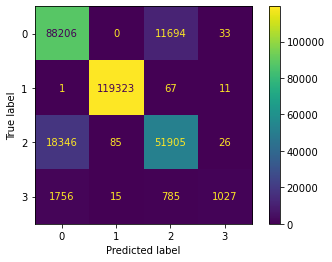

In [42]:
label = ['hospitalized', 'nonhospitalized','recovered', 'deceased']
y_train_pred = rf_Grid2.predict(x_train)
ev_tr_report = classification_report(y_train, y_train_pred)
ev_tr_accuracy = accuracy_score(y_train, y_train_pred)
ev_tr_matrix = confusion_matrix(y_train, y_train_pred,labels=label)
print(ev_tr_report)
ConfusionMatrixDisplay(ev_tr_matrix).plot()

## Tuning model By Randomized Search


In [43]:
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import RandomizedSearchCV

rfa = RandomForestClassifier()
rf_paras = {'criterion': ['gini'], 
            'n_estimators': randint(15, 50),'max_features': [0.6],'max_depth': randint(30, 40)}
rf_scoring = {'fl_score_deseased': make_scorer(f1_score, average=None, labels=['deceased']),
              'recall_deseased': make_scorer(recall_score,average=None,labels=['deceased']),
              'accuracy': make_scorer(accuracy_score),
              'recall': make_scorer(overall_recall)}

rf_RanSearch = RandomizedSearchCV(estimator=rfa, param_distributions=rf_paras, scoring=rf_scoring, cv=5, verbose=2, n_jobs=4, refit='fl_score_deseased')
rf_RanSearch.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  8.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10325a0d0>,
                                        'max_features': [0.6],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x122a21e20>},
                   refit='fl_score_deseased',
                   scoring={'accuracy': make_scorer(accuracy_score),
                            'fl_score_deseased': make_scorer(f1_score, average=None, labels=['deceased']),
                            'recall': make_scorer(overall_recall),
                            'recall_deseased': make_scorer(recall_score, average=None, labels=['deceased'])},
                   verbose=2)

In [45]:
pd.DataFrame(rf_RanSearch.cv_results_)[['param_max_depth','param_max_features', 'param_criterion', 'param_n_estimators', 'mean_test_fl_score_deseased', 'rank_test_fl_score_deseased', 'mean_test_recall_deseased', 'rank_test_recall_deseased','mean_test_accuracy', 'rank_test_accuracy', 'mean_test_recall', 'rank_test_recall']]


,param_max_depth,param_max_features,param_criterion,param_n_estimators,mean_test_fl_score_deseased,rank_test_fl_score_deseased,mean_test_recall_deseased,rank_test_recall_deseased,mean_test_accuracy,rank_test_accuracy,mean_test_recall,rank_test_recall
0,37,0.6,gini,33,0.213550,1,0.132563,2,0.872634,5,0.676162,1
1,38,0.6,gini,43,0.210899,3,0.130888,4,0.872763,3,0.675853,3
2,34,0.6,gini,48,0.210282,7,0.130052,8,0.872654,4,0.675552,7
3,34,0.6,gini,23,0.210388,5,0.130609,6,0.872422,9,0.675484,8
4,32,0.6,gini,37,0.208640,9,0.128935,9,0.872814,1,0.675440,9
5,39,0.6,gini,21,0.209773,8,0.130889,3,0.872463,8,0.675685,5
6,37,0.6,gini,43,0.211419,2,0.130611,5,0.872634,5,0.675725,4
7,36,0.6,gini,16,0.210654,4,0.132842,1,0.872255,10,0.675910,2
8,37,0.6,gini,47,0.206993,10,0.127818,10,0.872797,2,0.675193,10
9,39,0.6,gini,39,0.210364,6,0.130052,7,0.872623,7,0.675603,6


## Saving and loading Tuning model

In [31]:
import pickle
filename = 'RandomForestModelTune.pkl'
pickle.dump(rf_Grid, open(filename,'wb'))

In [20]:
model = pickle.load(open('RandomForestModelTune.pkl','rb'))

In [21]:
model.best_params_

{'criterion': 'gini', 'max_features': 0.6, 'n_estimators': 20}

In [40]:
model.best_estimator_

RandomForestClassifier(max_features=0.6, n_estimators=20)

### Train result for tuning model

Train
                 precision    recall  f1-score   support

       deceased       0.92      0.29      0.45      3583
   hospitalized       0.81      0.89      0.85     99933
nonhospitalized       1.00      1.00      1.00    119402
      recovered       0.81      0.73      0.77     70362

       accuracy                           0.89    293280
      macro avg       0.89      0.73      0.77    293280
   weighted avg       0.89      0.89      0.89    293280



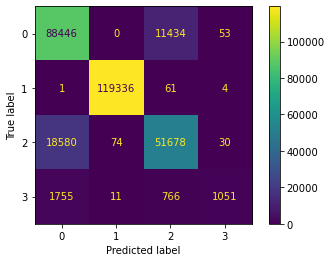

In [61]:
label = ['hospitalized', 'nonhospitalized','recovered', 'deceased']
y_train_pred = model.predict(x_train)
ev_tr_report = classification_report(y_train, y_train_pred)
ev_tr_accuracy = accuracy_score(y_train, y_train_pred)
ev_tr_matrix = confusion_matrix(y_train, y_train_pred,labels=label)
print('Train')
print(ev_tr_report)
ConfusionMatrixDisplay(ev_tr_matrix).plot()

### Test result for tuning model

Validation
                 precision    recall  f1-score   support

       deceased       0.47      0.14      0.22       912
   hospitalized       0.80      0.87      0.84     24862
nonhospitalized       0.99      0.99      0.99     30018
      recovered       0.78      0.71      0.74     17528

       accuracy                           0.87     73320
      macro avg       0.76      0.68      0.70     73320
   weighted avg       0.87      0.87      0.87     73320



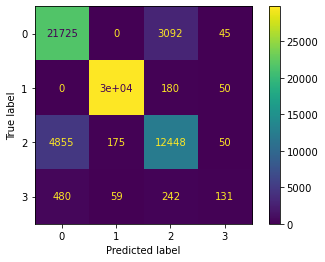

In [62]:
label = ['hospitalized', 'nonhospitalized','recovered', 'deceased']

y_test_pred = model.predict(x_test)
ev_te_report = classification_report(y_test, y_test_pred)
ev_te_accuracy = accuracy_score(y_test, y_test_pred)
ev_te_matrix = confusion_matrix(y_test, y_test_pred,labels=label)
print('Validation')
print(ev_te_report)
ConfusionMatrixDisplay(ev_te_matrix).plot()

### Prediction on test set


In [59]:
from collections import Counter

label = ['hospitalized', 'nonhospitalized','recovered', 'deceased']
dest = 'predictions.txt'
te_pred = model.predict(dt)
te_pred = pd.DataFrame(te_pred, columns = ['outcome'])
te_pred.to_csv(dest,index=False,header=False)
file_data = open(dest, 'rb').read()
open(dest, 'wb').write(file_data[:-2])
print('te_pred len:',len(te_pred))
counted = Counter(te_pred['outcome'])
counted


te_pred len: 46500


Counter({'nonhospitalized': 20114,
         'hospitalized': 18943,
         'recovered': 5223,
         'deceased': 2220})

In [ ]:
Counter({'nonhospitalized': 19966,
         'hospitalized': 15850,
         'recovered': 10188,
         'deceased': 496})

### load default model and compare to tuned model

In [5]:
import pickle
defaultModel = pickle.load(open('RandomForestModel.pkl','rb'))

In [14]:
f1_score(y_train, defaultModel.predict(x_train),labels=['deceased'], average='macro')

0.4439701173959445

                 precision    recall  f1-score   support

       deceased       0.94      0.29      0.44      3583
   hospitalized       0.81      0.89      0.85     99933
nonhospitalized       1.00      1.00      1.00    119402
      recovered       0.81      0.73      0.77     70362

       accuracy                           0.89    293280
      macro avg       0.89      0.73      0.77    293280
   weighted avg       0.89      0.89      0.89    293280



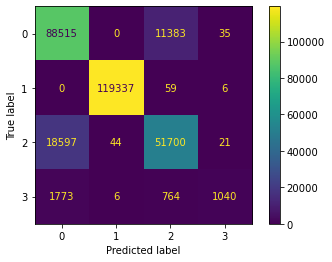

In [15]:
label = ['hospitalized', 'nonhospitalized','recovered', 'deceased']
y_train_pred = defaultModel.predict(x_train)
ev_tr_report = classification_report(y_train, y_train_pred)
ev_tr_accuracy = accuracy_score(y_train, y_train_pred)
ev_tr_matrix = confusion_matrix(y_train, y_train_pred,labels=label)
print(ev_tr_report)
ConfusionMatrixDisplay(ev_tr_matrix).plot()

In [ ]:
label = ['hospitalized', 'nonhospitalized','recovered', 'deceased']
y_train_pred = defaultModel.predict(x_train)
ev_tr_report = classification_report(y_train, y_train_pred)
ev_tr_accuracy = accuracy_score(y_train, y_train_pred)
ev_tr_matrix = confusion_matrix(y_train, y_train_pred,labels=label)
print(ev_tr_report)
ConfusionMatrixDisplay(ev_tr_matrix).plot()

## Matrix Evaluation and result

### Evaluating Matrix for Train set

Text(0.5, 1.0, 'Confusion matrix for train set')

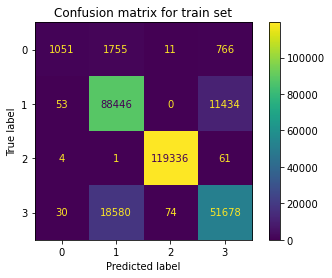

In [41]:
y_train_pred = model.predict(x_train)
train_matrix = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(train_matrix).plot()
plt.title('Confusion matrix for train set')

In [42]:
print('Train accuracy: ', accuracy_score(y_train, model.predict(x_train)))
print('Train overall recall: ', recall_score(y_train, model.predict(x_train), average='macro'))

Train accuracy:  0.8882671849427168
Train overall recall:  0.7280721959756495


In [43]:
ev_train_report = classification_report(y_train, model.predict(x_train))
print('Trainset')
print(ev_train_report)

Trainset
                 precision    recall  f1-score   support

       deceased       0.92      0.29      0.45      3583
   hospitalized       0.81      0.89      0.85     99933
nonhospitalized       1.00      1.00      1.00    119402
      recovered       0.81      0.73      0.77     70362

       accuracy                           0.89    293280
      macro avg       0.89      0.73      0.77    293280
   weighted avg       0.89      0.89      0.89    293280



### Evaluating Matrix for Test set

Text(0.5, 1.0, 'Confusion matrix for test set')

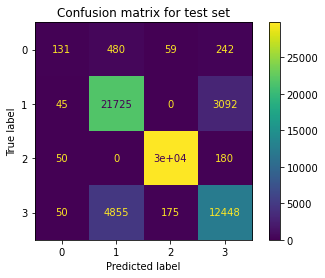

In [44]:
y_test_pred = model.predict(x_test)
test_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_matrix).plot()
plt.title('Confusion matrix for test set')

In [45]:
print('Test accuracy: ', accuracy_score(y_test, model.predict(x_test)))
print('Test overall recall: ', recall_score(y_test, model.predict(x_test), average='macro'))

Test accuracy:  0.8741407528641572
Test overall recall:  0.6799949470291891


In [46]:
ev_va_report = classification_report(y_test, model.predict(x_test))
print('Testset')
print(ev_va_report)

Testset
                 precision    recall  f1-score   support

       deceased       0.47      0.14      0.22       912
   hospitalized       0.80      0.87      0.84     24862
nonhospitalized       0.99      0.99      0.99     30018
      recovered       0.78      0.71      0.74     17528

       accuracy                           0.87     73320
      macro avg       0.76      0.68      0.70     73320
   weighted avg       0.87      0.87      0.87     73320



## Checking for Overfitting

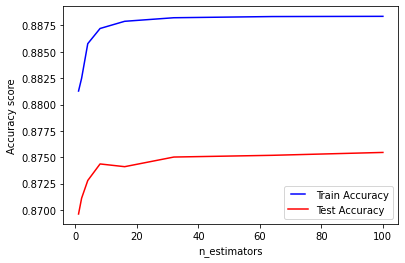

In [233]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train = []
test = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rf.fit(x_train, y_train)
    train.append(accuracy_score(y_train, rf.predict(x_train)))
    test.append(accuracy_score(y_test, rf.predict(x_test)))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train, "b", label="Train Accuracy")
line2, = plt.plot(n_estimators, test, "r", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("n_estimators")
plt.show()

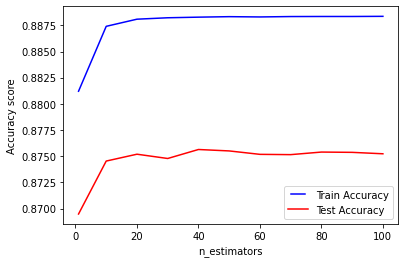

In [237]:
n_estimators = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train = []
test = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rf.fit(x_train, y_train)
    train.append(rf.score(x_train,y_train))
    test.append(rf.score(x_test,y_test))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train, "b", label="Train Accuracy")
line2, = plt.plot(n_estimators, test, "r", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("n_estimators")
plt.show()

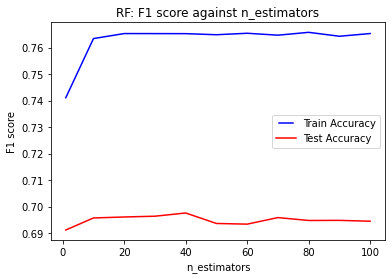

In [270]:
from sklearn.metrics import f1_score
n_estimators = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train = []
test = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rf.fit(x_train, y_train)
    train.append(f1_score(y_train, rf.predict(x_train), average='macro'))
    test.append(f1_score(y_test, rf.predict(x_test), average='macro'))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train, "b", label="Train Accuracy")
line2, = plt.plot(n_estimators, test, "r", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("F1 score")
plt.xlabel("n_estimators")
plt.title('RF: F1 score against n_estimators')
plt.show()

[]

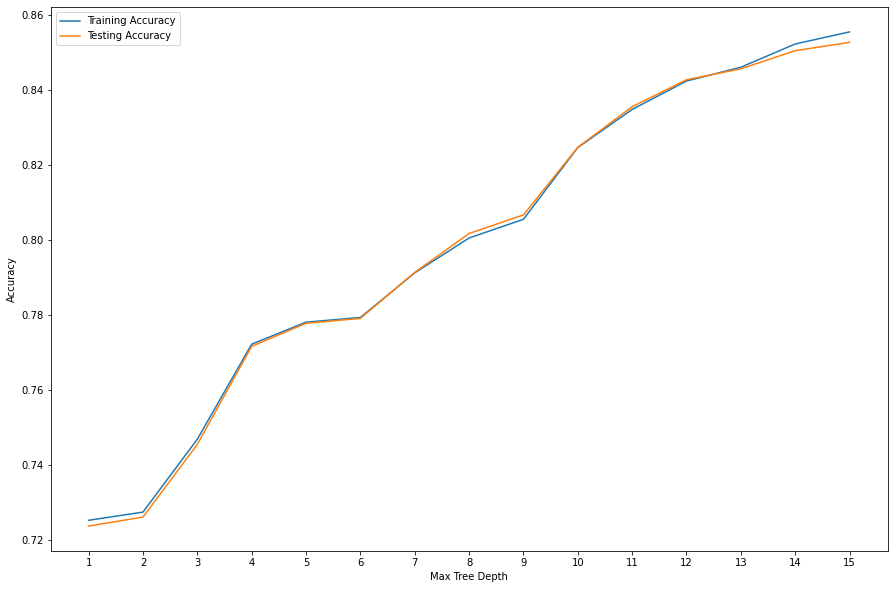

In [242]:
max_depth_list = np.linspace(1, 15, num=15)

train_accuracy = []
test_accuracy = []

for i in max_depth_list:
    rfc = RandomForestClassifier(max_depth=int(i)) 
    rfc.fit(x_train,y_train)
    train_accuracy.append(rfc.score(x_train, y_train))
    test_accuracy.append(rfc.score(x_test, y_test))

x = np.arange(len(max_depth_list)) + 1
plt.figure(figsize=(15,10))
plt.xticks(x)
plt.plot(x, train_accuracy, label='Training Accuracy')
plt.plot(x, test_accuracy, label='Testing Accuracy')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

[]

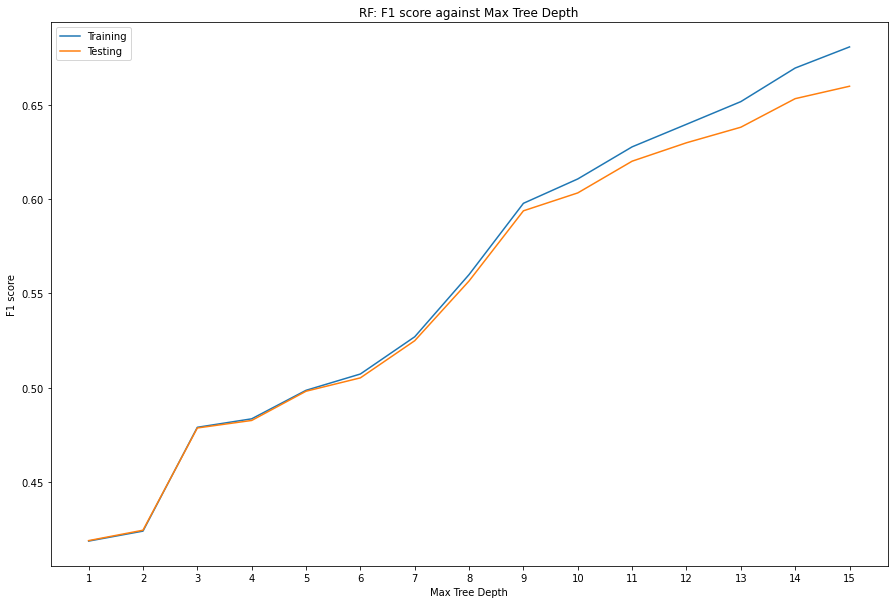

In [272]:
max_depth_list = np.linspace(1, 15, num=15)

train_accuracy = []
test_accuracy = []

for i in max_depth_list:
    rfc = RandomForestClassifier(max_depth=int(i)) 
    rfc.fit(x_train,y_train)
    train_accuracy.append(f1_score(y_train, rfc.predict(x_train), average='macro'))
    test_accuracy.append(f1_score(y_test, rfc.predict(x_test), average='macro'))

x = np.arange(len(max_depth_list)) + 1
plt.figure(figsize=(15,10))
plt.xticks(x)
plt.plot(x, train_accuracy, label='Training')
plt.plot(x, test_accuracy, label='Testing')
plt.xlabel('Max Tree Depth')
plt.ylabel('F1 score')
plt.title('RF: F1 score against Max Tree Depth')
plt.legend()
plt.plot()